##NAME : ESHANT MAHALE
##TASK 6: PREDICTION USING DECISION TREE CLASSIFIER

####TASK: Predicting the species(class) of the new Iris flower based on the flower attributes using decision tree and visualising the classifier.

#Reading the Dataset

In [1]:
#importing initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the dataset in the fl_data dataframe
fl_data = pd.read_csv("/Iris.csv")
fl_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
fl_data.shape

(150, 6)

In [10]:
fl_data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
fl_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Thus we have a Iris dataset which contains data of 150 flowers containing its Sepallength, Sepalwidth , PetalLength , PetalWidth and its corresponding Species. 
In the next code we saw there are 3 distinct types of species , thus we have three different classes for our classifier.
Next we saw there are no null values in any of the column thus no imputation/removal required.

#Model Selection

Now we will divide the data into the row and column variable and split it into training and test sets using Scikit learn library.

In [21]:
x = fl_data.drop(["Species","Id"],axis=1) #predictor variables which are Sepallength, Sepalwidth , PetalLength , PetalWidth
y= fl_data["Species"] #variable to be predicted
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

Thus we can see that the original data is split into training and test (25 percent split) , that is 112 rows in training and 38 rows in test of the 150 entries in the orginal data.
Next we will build a decision tree model using our training dataset.

#Decision Tree Model

In [25]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

dtf = DecisionTreeClassifier(max_depth=4) #keeping max no of levels = 4
dtf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Thus we have made a decision tree model , now lets visualise it graphically and check the model path.

In [26]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

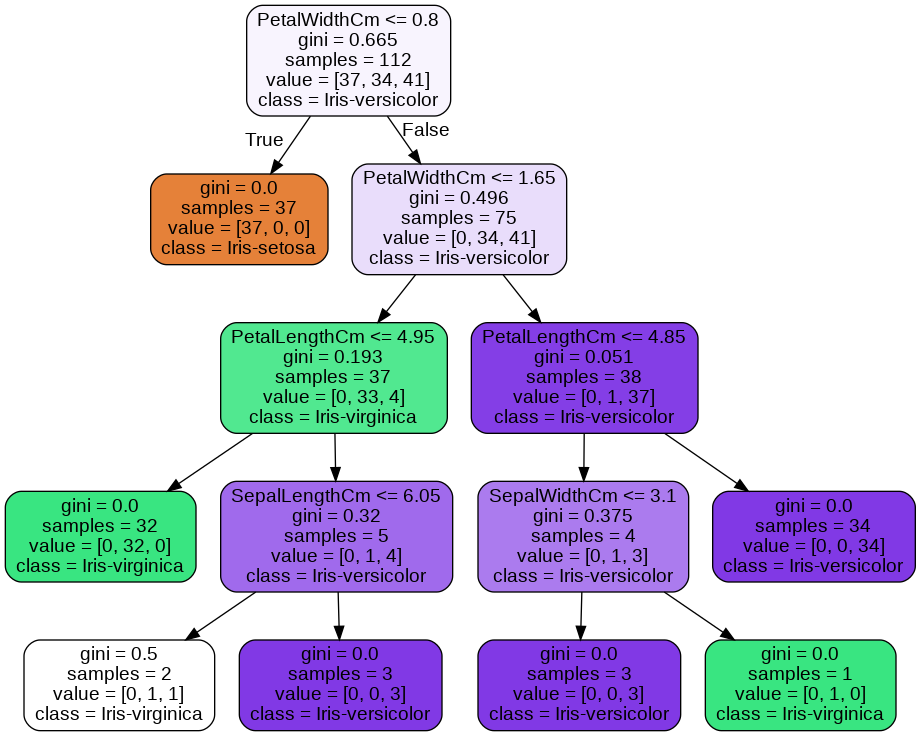

In [27]:
dot_data = StringIO()  

export_graphviz(dtf, out_file=dot_data, filled=True, rounded=True,
                feature_names=x.columns, 
                class_names=["Iris-setosa", "Iris-virginica", "Iris-versicolor"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Thus we can see our tree model with a varied network with no of levels as 4(as specified in the code) .
Each block contains sample size, correponding matrix value and class of the flower , which is segregated by its SepalLength .
Now we will test this Decision tree model to our test dataset and check the prediction accuracy.

#Predicting Values

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
test_pred = dtf.predict(x_test) #predicting values of the test dataset

# now lets check the accuracy_score to check how fit is the model to the new data
print('Accuracy Score:', accuracy_score(y_test, test_pred))


Accuracy Score: 0.9736842105263158


In [29]:
#Comparing the predicted value and the actual value
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
df_compare.head()

,Actual,Predicted
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica


Thus we have a prediction accuracy of **97.37 %** which implies that model gives an perfect prediction on the new data.
In next code you can also see some of the correctly predicted values.


Note: We can increase the prediction accuracy score by several methods like changing the split of data or changing the no. of levels of the model tree.

#Prediction on random new data

In [32]:
#predicting the species on a random new data
fl = [['5','3','2','0.5']] # Sepallength=5, Sepalwidth=3 ,PetalLength=2 , PetalWidth=0.5
new_pred = dtf.predict(fl)
print("Predicted species of flower = {}".format(new_pred[0]))

Predicted species of flower = Iris-setosa


Thus on a random value of attributes , the model gives a predicted species of flower.